# Twitter Sentimental Analysis


The initial steps for data analysis in Python include:

1. **Data Acquisition:** This dataset is downloaded from this link : https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook
 
2. **Loading the Data:** The Data is in .csv format.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

## Add necessary Libraries to the project

In [1]:
from function import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




In [2]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

## Loading the Dataset

We have adataset of tweets and we want to figure out if a tweet is : "Negative", "Positive", "Neutral"

First we upload the Dataset:

In [3]:
primary_data = pd.read_csv("Data/sentimental_data.csv")

In [4]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
primary_data.shape

(31015, 4)

So We have 31015 tweets in the dataset

## First EDA - Before Cleaning the Data

In [6]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [7]:
primary_data.describe()

,Unnamed: 0
count,31015.000000
mean,12375.681154
std,8387.965355
min,0.000000
25%,4219.500000
50%,11973.000000
75%,19726.500000
max,27480.000000


### Univariate analysis of 'sentiment' column:

Lets look at the distribution of tweets in the dataset

In [8]:
temp = primary_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,12547
2,positive,9685
0,negative,8782


In [9]:
# Calculating the proportions for each value in 'temp' and rounding the results to two decimal places
(temp['text']/temp['text'].sum()).round(2)

1    0.40
2    0.31
0    0.28
Name: text, dtype: float64

Text(0.5, 1.0, 'Sentiment Distribution in Primary Data')

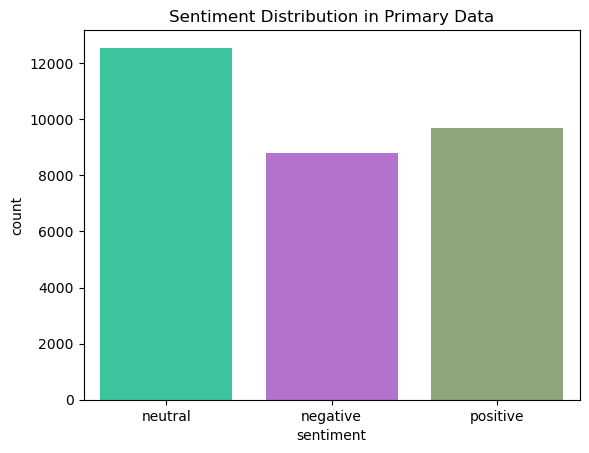

In [10]:
# plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=primary_data, palette=random_colours(3))

# Add a title
plt.title('Sentiment Distribution in Primary Data')

**Insights** for 'sentiment':

- The most common sentiment classification is 'neutral', comprising approximately 40% of the properties in the dataset.
- The second most frequent sentiment classification is 'positive' making up roughly 31%.

### One hot Encodding

We first (again) find out how many category do we have in "sentiment" column:

In [11]:
primary_data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Now we change them to numerical values:

- **Negative : 0**
- **Neutral : 1**
- **Positive : 2**

In [12]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [13]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
primary_data['sentiment'] = label_encoder.fit_transform(primary_data['sentiment'])

primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",1
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0
2,2,088c60f138,my boss is bullying me...,0
3,3,9642c003ef,what interview! leave me alone,0
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0


## Cleaning the dataset

### Remove Not important Columns
Remove "Unnamed:0" column

In [14]:
primary_data.drop(columns=["Unnamed: 0"], inplace=True)
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0
2,088c60f138,my boss is bullying me...,0
3,9642c003ef,what interview! leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0


### Remove NA Values

In [15]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     31015 non-null  object
 1   text       31014 non-null  object
 2   sentiment  31015 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.0+ KB


In [16]:
primary_data.isna().sum()

textID       0
text         1
sentiment    0
dtype: int64

We have one null Value in the dataset, we will just remove it

In [17]:
primary_data.dropna(axis = 0, how ='any',inplace=True) 

In [18]:
primary_data.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

We have no more NA value

### Remove punctutations
There are some Uppercase, lowercase, punctutation in text. so we are going to clean them. What is "clean_text_syntax" exactly doing?

- Make text lowercase
- remove text in square brackets
- remove links
- remove punctuation
- remove words containing numbers

In [19]:
primary_data['text'] = primary_data['text'].apply(str).apply(lambda x: text_preprocessing(x))
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,id have responded if i were going,1
1,549e992a42,sooo sad i will miss you here in san diego,0
2,088c60f138,my boss is bullying me,0
3,9642c003ef,what interview leave me alone,0
4,358bd9e861,sons of why couldnt they put them on the relea...,0


In [20]:
primary_data['text_char_count'] = primary_data['text'].astype(str).apply(len)
primary_data['text_word_count'] = primary_data['text'].apply(lambda x: len(str(x).split()))
primary_data.head()

,textID,text,sentiment,text_char_count,text_word_count
0,cb774db0d1,id have responded if i were going,1,33,7
1,549e992a42,sooo sad i will miss you here in san diego,0,42,10
2,088c60f138,my boss is bullying me,0,22,5
3,9642c003ef,what interview leave me alone,0,29,5
4,358bd9e861,sons of why couldnt they put them on the relea...,0,67,13


## Second EDA - After Cleaning the Data

### Univariate Analysis of numerical columns

In [21]:
# Summary statistics for the dataset
primary_data.describe()

,sentiment,text_char_count,text_word_count
count,31014.000000,31014.000000,31014.000000
mean,1.029116,61.969691,12.439672
std,0.771111,33.396842,6.736474
min,0.000000,0.000000,0.000000
25%,0.000000,34.000000,7.000000
50%,1.000000,57.000000,12.000000
75%,2.000000,88.000000,18.000000
max,2.000000,137.000000,32.000000


**Insights** from Summary Statistics for 'primary_data':

- The average (mean) number of words in each text in the dataset is approximately `12`.

- The average (mean) number of characters in each text in the dataset is approximately `61`.

- The median number of words in each text (middle value when sorted) stands at `12`. The median is equal the mean, suggesting no skew in the distribution of number of words in each text.

- The standard deviation, a measure of the amount of variation or dispersion in the number of words in each text, is approximately `6`. This indicates that sale prices can vary significantly from the average.

- The minimum and maximum number of words in each text are `0` and `32`, respectively, highlighting a wide range of property values in the dataset.

- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `7` and `18`. This means that 50% of the number of words in each text in the dataset are within this price range.

### Histograms

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_59378/3382048974.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(primary_data['text_word_count'], kde=True, bins=30, palette=random_colours(1))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of words in each text Distribution in Primary Data')

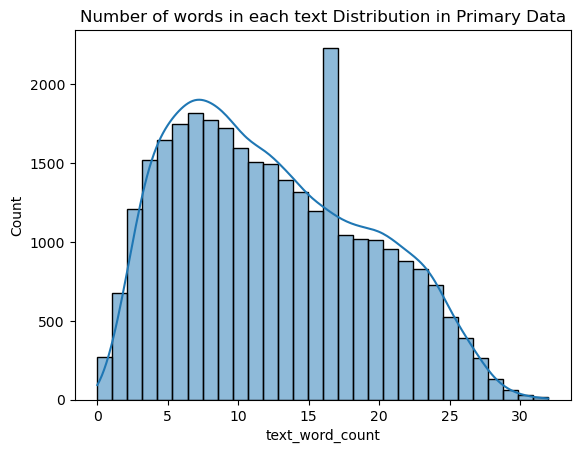

In [22]:
# Plotting a histogram for the 'text_word_count' column of the 'primary_data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(primary_data['text_word_count'], kde=True, bins=30, palette=random_colours(1))

# Add a title
plt.title('Number of words in each text Distribution in Primary Data')

**Insights:**
- The histogram reveals that the majority of the word Number are in the range of approximately `5` to `10`. However, there's a long tail on the right side.

If we wanted to plot at the same time all the numerical variables with histograms, without a for loop, we could do so using matplotlib:

array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'text_char_count'}>],
       [<Axes: title={'center': 'text_word_count'}>, <Axes: >]],
      dtype=object)

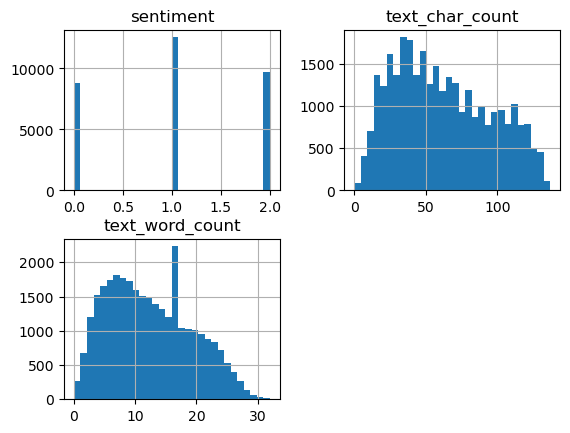

In [23]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = primary_data.select_dtypes("number")

# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(bins=30, xlabelsize=10, ylabelsize=10)

## Split Data into Train and Test

First we need to distinguish from features and target

In [24]:
# features = primary_data.drop(columns = ["sentiment"])
features = primary_data["text"]
target = primary_data["sentiment"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [26]:
X_train.head()

15312    going to get some strawberries for the champag...
14569                      just watched jonas it was funny
13452    just days left for the offf in oeiras portugal...
4966     castlebar doesnt have so im going to galway to...
25520               off to friendss for theree birthdayy x
Name: text, dtype: object

In [27]:
y_train.head()

15312    1
14569    2
13452    1
4966     1
25520    1
Name: sentiment, dtype: int64

## Check the Balance of Train Data

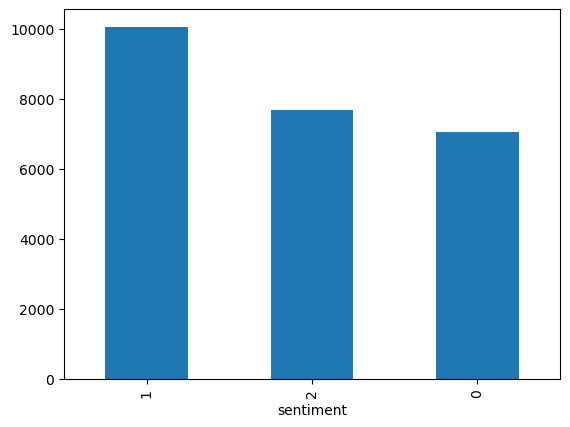

In [28]:
survived = y_train.value_counts()
survived.plot(kind="bar")
plt.show()

The dataset is not extremely imbalanced, but there is some imbalance, particularly with the "neutral" sentiment having a higher count than "positive" and "negative."

So I decided to continue without **Oversmapling** and then for improving the models perforamnce check wether **Oversampling** can help improving the accuracy or not.

## Machine Learning Models

#### Vectorize the text data

- The 'CountVectorizer' converts text data into a numerical matrix based on word counts (excluding stopwords).
- 'fit_transform' learns the vocabulary and transforms the training data.
- 'transform' converts the test data using the learned vocabulary.
This process prepares the text data for machine learning models, which typically require numerical input.

<div class="alert alert-block alert-info">
<b>Code sample:</b> 

``` python
X_train = ["I love programming", "Python is great", "I love Python"]

X_test = ["Programming in Python", "I love coding"]

'CountVectorizer' output:
['great', 'love', 'programming', 'python']

'transform' and 'fit_transform' Output:

[[0 1 1 0]  # "I love programming" -> ['great', 'love', 'programming', 'python']

[1 0 0 1]  # "Python is great" -> ['great', 'love', 'programming', 'python']

[0 1 0 1]] # "I love Python" -> ['great', 'love', 'programming', 'python']
``` 

</div>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

***

### 1. Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test_vect)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6556504916975657
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62      1727
           1       0.59      0.69      0.64      2487
           2       0.73      0.69      0.71      1989

    accuracy                           0.66      6203
   macro avg       0.67      0.65      0.66      6203
weighted avg       0.66      0.66      0.66      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of in Naive Bayes Model is : 0.66 %
</div>

**Tuning the hyperparameters with GridSearch**

In [31]:
best_hyperparametered_model = find_best_hyperparametered_model("Naive_Bayes", MultinomialNB(), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nNaive Bayes Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Parameter tuning Started ...
Best Parameters: {'alpha': 5.0}
Best Score: 0.6492280765613951
Naive Bayes Parameter tuning Finished.

Naive Bayes Accuracy After Parameter Tuning: 0.6533935192648719


#### Cross validation :

<div class="alert alert-block alert-info">
<b>Cross-Validation:</b> 
Adding cross-validation to the machine learning models helps ensure that the models are not overfitting to a single train-test split and that they generalize well to unseen data. So we add it to the models. If your model performs well on all folds during cross-validation, it's likely not overfitting.
</div>

So this following code run **Naive Bayes Model** with cross validation.

In [32]:
from sklearn.model_selection import cross_val_score

# Instantiate the model
nb_model = MultinomialNB()

X_vect = vectorizer.fit_transform(features)

# Perform cross-validation
nb_cv_scores = cross_val_score(nb_model, X_vect, target, cv=5)

# Print the results
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Naive Bayes Mean Accuracy:", nb_cv_scores.mean())


Naive Bayes Cross-Validation Scores: [0.64339836 0.64646139 0.64742866 0.64549412 0.65043534]
Naive Bayes Mean Accuracy: 0.6466435736044958


***

### 2. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_vect)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6867644688054168
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1727
           1       0.63      0.74      0.68      2487
           2       0.78      0.70      0.74      1989

    accuracy                           0.69      6203
   macro avg       0.70      0.68      0.69      6203
weighted avg       0.69      0.69      0.69      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of Logistic Regression Model is : 0.69 %
</div>

**Tuning the hyperparameters with Randomized Search**

In [34]:
# best_hyperparametered_model = find_best_hyperparametered_model("Logistic", LogisticRegression(max_iter=1000), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nLogistic Regression Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


Logistic Regression Accuracy After Parameter Tuning: 0.6533935192648719


***

### 3. SVM

In [35]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_vect)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6940190230533613
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63      1727
           1       0.62      0.80      0.70      2487
           2       0.79      0.70      0.74      1989

    accuracy                           0.69      6203
   macro avg       0.72      0.68      0.69      6203
weighted avg       0.71      0.69      0.69      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of SVM Model is : 0.69 %
</div>

**Tuning the hyperparameters with Randomized Search**

In [36]:
# best_hyperparametered_model = find_best_hyperparametered_model("SVM", SVC(), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nSVM Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy After Parameter Tuning: 0.6533935192648719


***

### 4. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_vect)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.6840238594228599
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1727
           1       0.63      0.71      0.67      2487
           2       0.75      0.73      0.74      1989

    accuracy                           0.68      6203
   macro avg       0.69      0.68      0.68      6203
weighted avg       0.69      0.68      0.68      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of Random Forest Model is : 0.68 %
</div>

**Tuning the hyperparameters with GridSearch**

In [38]:
# best_hyperparametered_model = find_best_hyperparametered_model("RandomForest", RandomForestClassifier(random_state=42), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nSVM Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy After Parameter Tuning: 0.6533935192648719


***

### 5. XGBoost
Gradient Boosting is an ensemble technique that builds models sequentially, each new model attempting to correct errors made by the previous models. It often outperforms Random Forests and other basic models.

In [41]:
import xgboost as xgb

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_vect)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/Erfan/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: /Users/Erfan/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [40]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


# Compare Model Performance